<a href="https://colab.research.google.com/github/tskmr/BS/blob/main/ex0613.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# セッション5実践編： エラー/エラーメッセージ


以下の設問について、何が問題だったのか、どのようにプログラムを修正すればよいのかを説明してください．


In [1]:
library(ggplot2)
library(dplyr)


Attaching package: ‘dplyr’


The following objects are masked from ‘package:stats’:

    filter, lag


The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union




xとyを足して24という値を求めたい：


In [40]:
x <- 14
y <- "10"
x + y

ERROR: ignored

数値と文字列を足そうとしたエラー．yを数値にすれば良い．

In [42]:
x <- 14
y <- 10
x + y

[1] 24

1+2を足して、3+4で割りたい：


In [43]:
((1+2)/(3+4)))

ERROR: ignored

カッコが一つ多い

In [44]:
((1+2)/(3+4))

[1] 0.4285714

残りの問題では、mtcarsデータセットを使用する：



In [4]:
data(mtcars)


1,2,・・・,L-1という数字のベクトルを変数 x に保存したい。ここで、Lは mtcars の列の数である。


In [45]:
x <- 1:ncol(mtcars)-1
x

[1]  0  1  2  3  4  5  6  7  8  9 10

1:11までを作ってから-1している間違い．1:(11-1)にしないといけない

In [47]:
x <- 1:(ncol(mtcars)-1)

In [10]:
dim(mtcars)
colnames(mtcars)
length(colnames(mtcars))

[1] 32 11

[1] "mpg"  "cyl"  "disp" "hp"   "drat" "wt"   "qsec" "vs"   "am"   "gear"
[11] "carb"

[1] 11

mpgとwtの散布図を作りたい：


In [49]:
ggplot(data = mtcars) +
    geom_point(y = mpg, x = wt)

ERROR: ignored

aes() が抜けている．

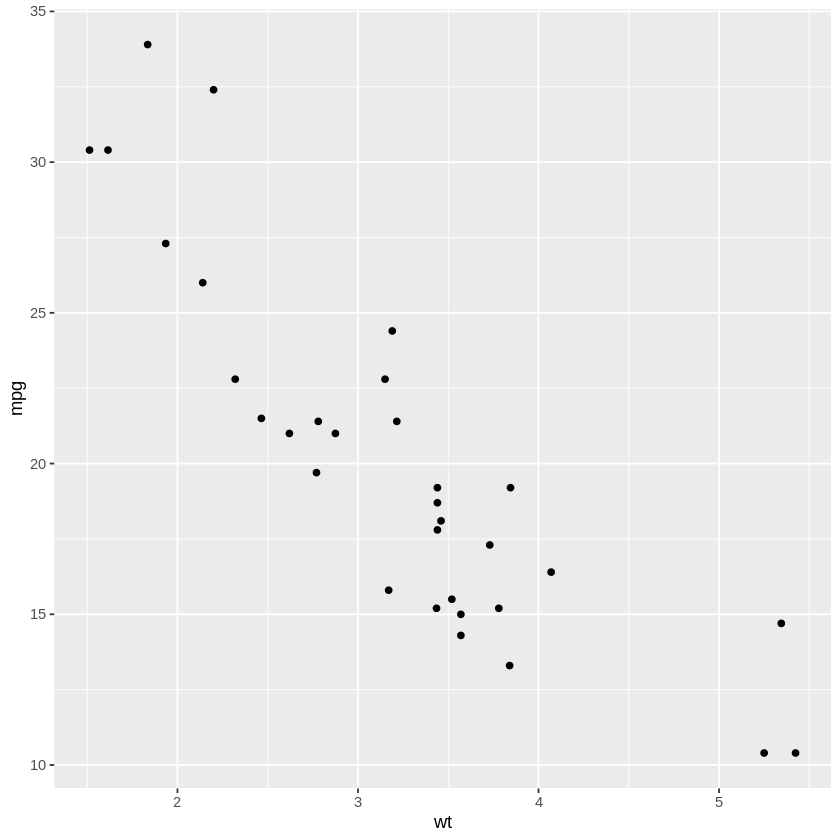

In [50]:
ggplot(data = mtcars) +
    geom_point(aes(y = mpg, x = wt))

mpgのヒストグラムを作りたい：


ERROR: ignored

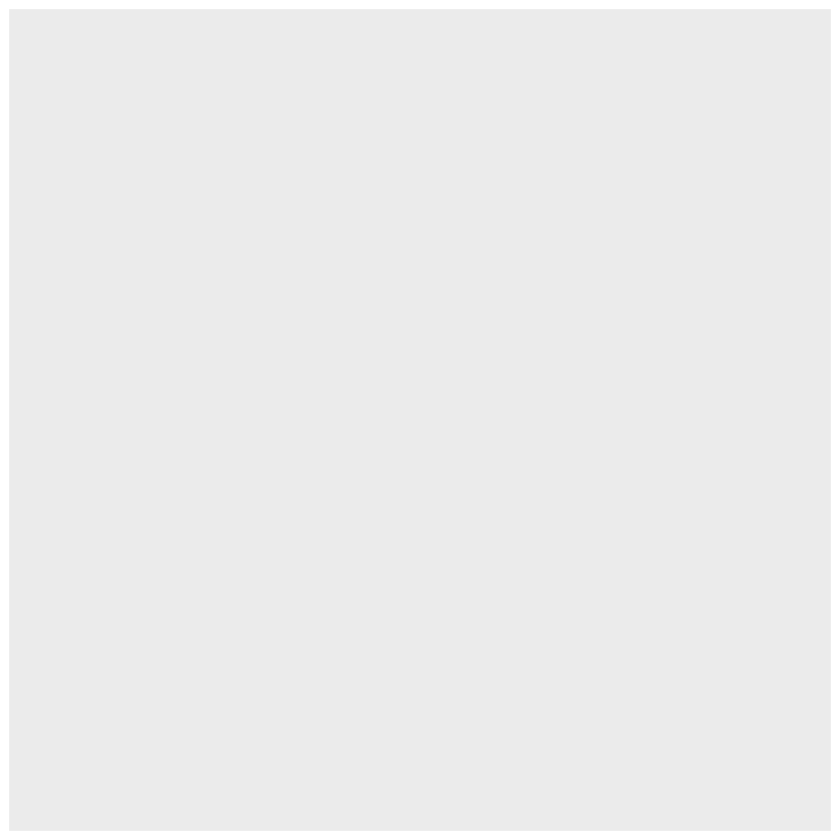

In [51]:
ggplot(data = mtcars)
    + geom_histogram(aes(x = mpg))

`+`は改行する前に書く必要がある．

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.


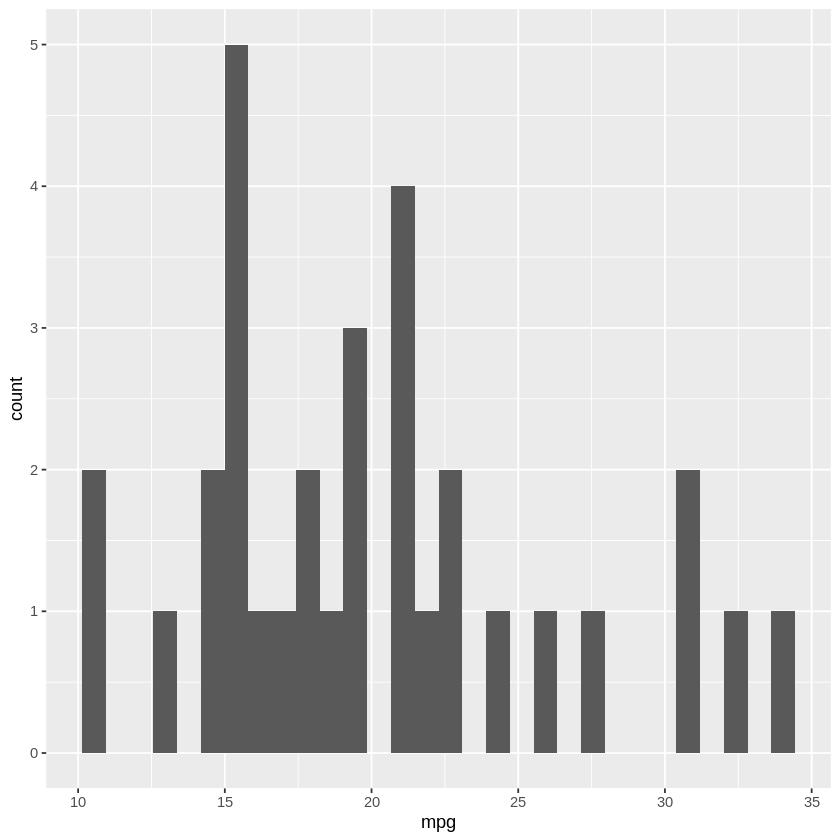

In [52]:
ggplot(data = mtcars) +
    geom_histogram(aes(x = mpg))

cylの各値に対してmpgのboxplotを作成し、ポイントでオーバーレイし、プロットにタイトルを付けたい：


Warning message:
“Continuous x aesthetic
ℹ did you forget `aes(group = ...)`?”


$title
[1] "Plot of mpg vs. cyl"

attr(,"class")
[1] "labels"

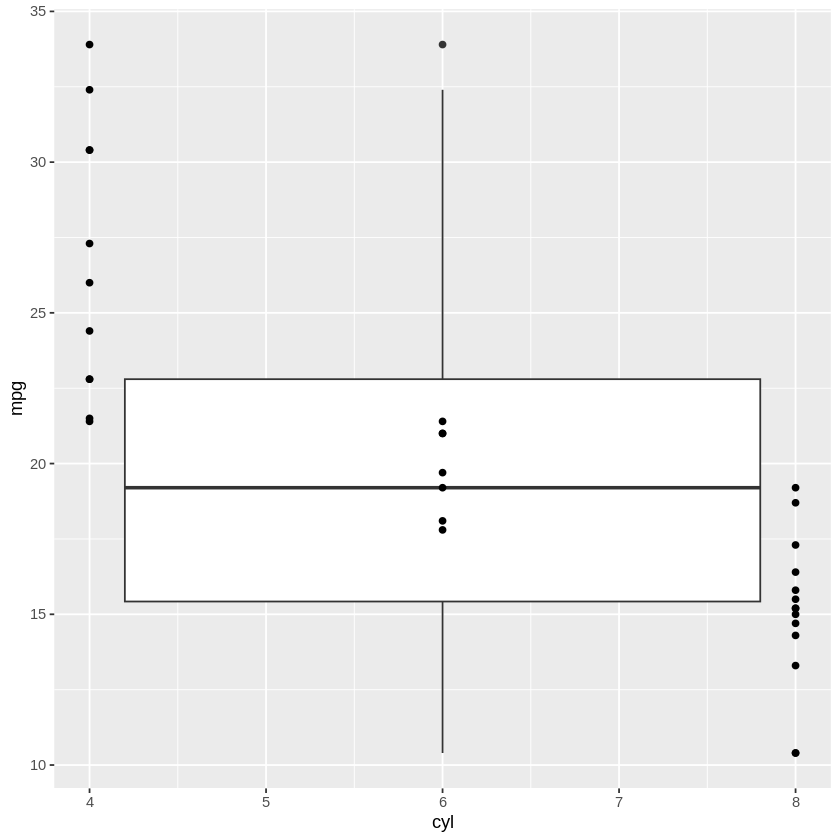

In [53]:
ggplot(data = mtcars, aes(x = cyl, y = mpg)) +
    geom_boxplot() +
    geom_point()
    labs(title = "Plot of mpg vs. cyl")

`boxplot`では，`group`で分けないといけない．

$title
[1] "Plot of mpg vs. cyl"

attr(,"class")
[1] "labels"

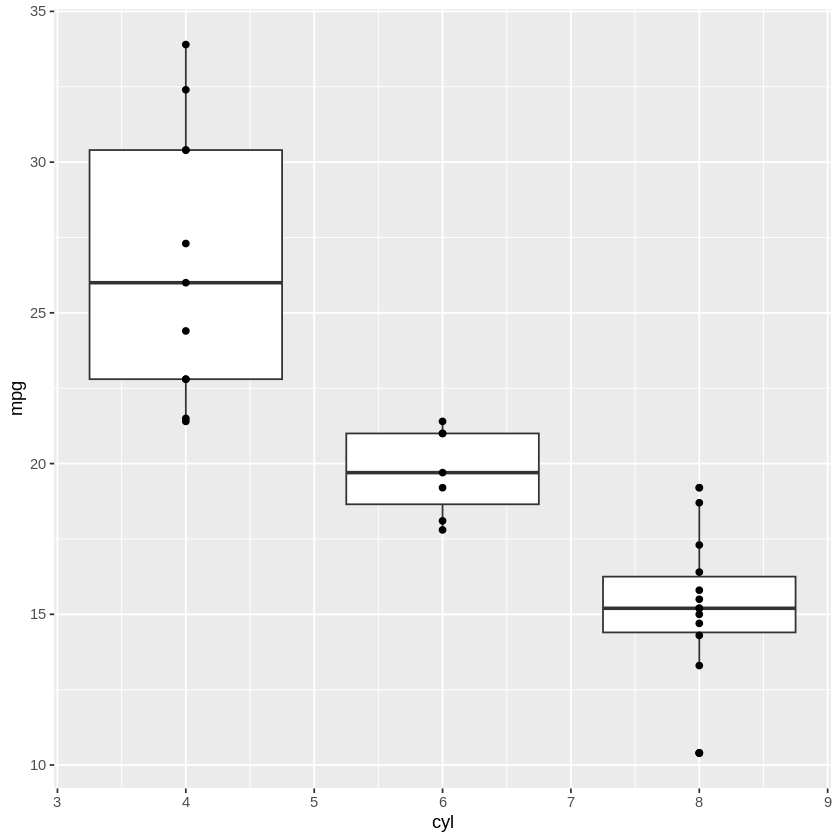

In [54]:
ggplot(data = mtcars, aes(x = cyl, y = mpg, group=cyl)) +
    geom_boxplot() +
    geom_point()
    labs(title = "Plot of mpg vs. cyl")

qsec vs. wt の散布図が欲しいが、すべての点を青く着色したい：


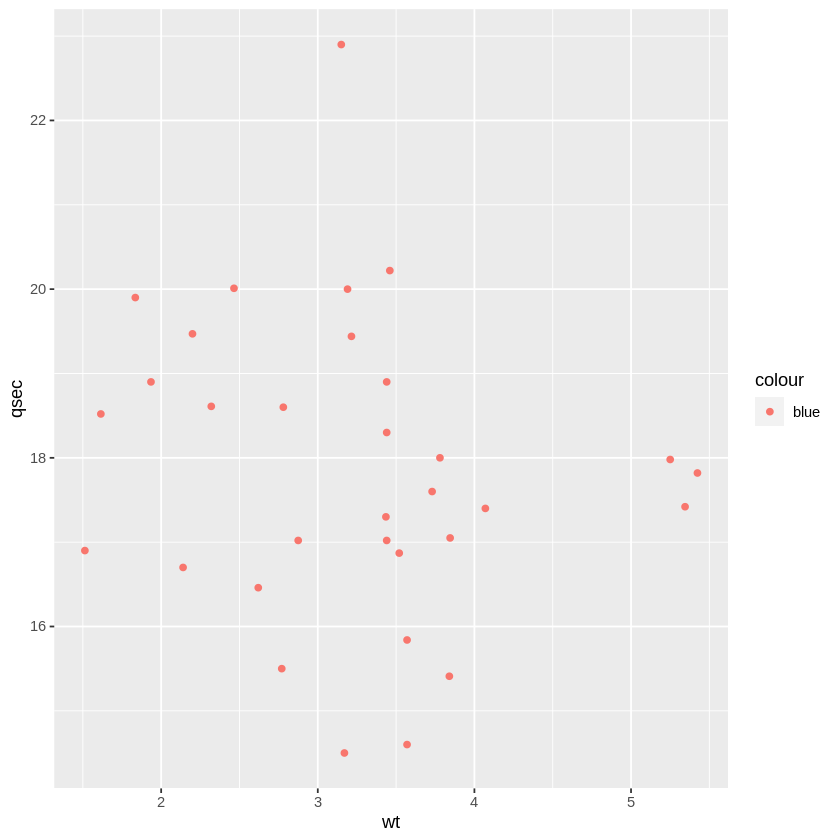

In [55]:
ggplot(data = mtcars, aes(y = qsec, x = wt)) +
    geom_point(aes(col = "blue"))


`aes()`の中で`col="blue"`としたため，"blue"という文字で色分けしようとしている．`ggplot`では離散データは，赤・青・緑のように順番に色が自動的に割り当てられる．
正しくは，`aes()`の外で色を指定する．

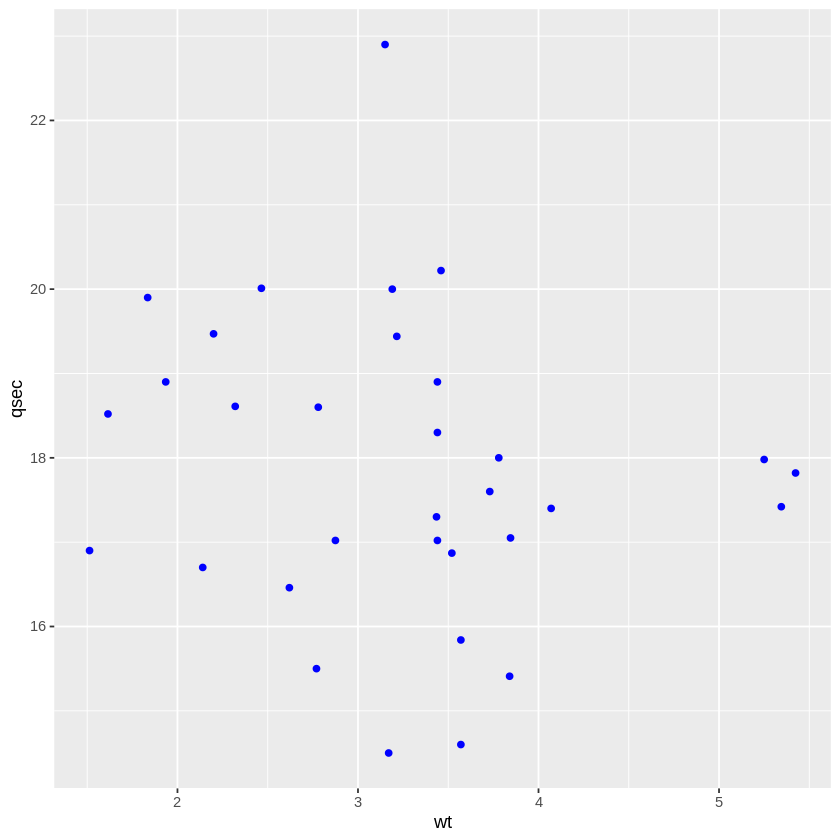

In [56]:
ggplot(data = mtcars, aes(y = qsec, x = wt)) +
    geom_point(col = "blue")


miles per quartという新しい列を作成し、最初の3行を表示したい：


In [57]:
mtcars %>% mutate(miles per quart = mpg / 4) %>% head(n = 3)


ERROR: ignored

列名にスペースや特殊記号を入れる場合は，``で囲む．

In [58]:
mtcars %>% mutate(`miles per quart` = mpg / 4) %>% head(3)

,mpg,cyl,disp,hp,drat,wt,qsec,vs,am,gear,carb,miles per quart
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
Mazda RX4,21.0,6,160,110,3.90,2.620,16.46,0,1,4,4,5.25
Mazda RX4 Wag,21.0,6,160,110,3.90,2.875,17.02,0,1,4,4,5.25
Datsun 710,22.8,4,108,93,3.85,2.320,18.61,1,1,4,1,5.70


gear の各値の平均値mpgを計算したい：


In [ ]:
mtcars %>% group_by(gear) %>% summarize(mean = mean)


`mean`するときは，どの列か指定しないといけない．

In [60]:
mtcars %>% group_by(gear) %>% summarise(mean = mean(mpg))

gear,mean
<dbl>,<dbl>
3,16.10667
4,24.53333
5,21.38000


データセット中の最大値であるhpとdispを計算したい：

In [61]:
mtcars %>% summarize(max = max(hp, disp))


max
<dbl>
472


２つの列でそれぞれ`max`を計算するときには，同時に`max`に入れてはいけない．

In [64]:
mtcars %>% summarize(max.hp = max(hp), max.disp=max(disp))

max.hp,max.disp
<dbl>,<dbl>
335,472


または，`summarize_all`を使っても良い．

In [65]:
mtcars %>% select(hp, disp) %>% summarize_all(max)

hp,disp
<dbl>,<dbl>
335,472
